In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

#for printing
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

import os

# Output File (CSV)
file_out = os.path.join("output_data/cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [101]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
    #lat_lng[0] == latitude
    #lat_lng[1] == longitude

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

## Perform API Calls

In [102]:
# OpenWeatherMap API Key
this_api_key = api_keys.api_key

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + this_api_key

#make the main dataframe to store info
df = pd.DataFrame(cities)

#create arrays to fill with correct api info
lats = []
temps = []
humis = []
cloudis = []
windsps = []
dates = []

print('Beginning Data Retrieval.\n-------------------------')

#city = 'xxpaoloxx' #test example
z = len(cities)
a = 1

for city in cities:
    #build url with city as parameter and get rid of spaces " "-->"%20"
    url_string = base_url + '&q=' + city
    url = url_string.replace(" ","%20")
    
    #store json response in re
    re = requests.get(url).json()
    
    if int(re['cod']) == 404: #when city is not found --> re['cod'] is 404
        
        #fill all with NaN
        lats.append(np.nan)
        temps.append(np.nan)
        humis.append(np.nan)
        cloudis.append(np.nan)
        windsps.append(np.nan)
        dates.append(np.nan)
        
        #mini print report
        print('\n' + url)
        print('ERROR 404: ' + city + ' not found\t' + str(a) + ' of ' + str(z))
        a+=1
        
    else: #meaning it was found
        
        #append json response data to arrays
        lats.append(re['coord']['lat'])
        temps.append(re['main']['temp'])
        humis.append(re['main']['humidity'])
        cloudis.append(re['clouds']['all'])
        windsps.append(re['wind']['speed'])
        dates.append(re['dt'])
        
        #mini print report
        print('\n' + url)
        print('processing city id: ' + str(re['id']) + '\t' + str(a) + ' of ' + str(z))
        print(city + ' appended to local data structures')
        a+=1
        
print('\n--------------\nfin.\nData Retrieval Complete\n--------------') #finished api requests

#append arrays to the dataframe
df['latitude'] = lats
df['temperature'] = temps
df['humidity'] = humis
df['cloudiness'] = cloudis
df['windspeed'] = windsps
df['data_retrieval_date'] = dates

Beginning Data Retrieval.
-------------------------

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=jamestown
processing city id: 2069194	1 of 622
jamestown appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=port%20alfred
processing city id: 964432	2 of 622
port alfred appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=old%20shinyanga
processing city id: 150885	3 of 622
old shinyanga appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=nikolskoye
processing city id: 546105	4 of 622
nikolskoye appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=paita
processing city id: 3694112	5 of 622
paita 


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=bethel
processing city id: 5880568	44 of 622
bethel appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=bundaberg
processing city id: 2173323	45 of 622
bundaberg appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=barentsburg
ERROR 404: barentsburg not found	46 of 622

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=kristallopiyi
ERROR 404: kristallopiyi not found	47 of 622

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=axim
processing city id: 2303611	48 of 622
axim appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=ta


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=taminango
processing city id: 3667471	88 of 622
taminango appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=vao
processing city id: 588365	89 of 622
vao appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=colac
processing city id: 2171069	90 of 622
colac appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=castro
processing city id: 3896218	91 of 622
castro appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=surt
processing city id: 2210554	92 of 622
surt appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imp


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=jackson
processing city id: 4632595	131 of 622
jackson appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=kamaishi
processing city id: 2112444	132 of 622
kamaishi appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=borogontsy
processing city id: 2026160	133 of 622
borogontsy appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=jenison
processing city id: 4997500	134 of 622
jenison appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=andenes
ERROR 404: andenes not found	135 of 622

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=mabaruma
processing city id: 3377301	174 of 622
mabaruma appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=antofagasta
processing city id: 3899539	175 of 622
antofagasta appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=sao%20filipe
processing city id: 3374210	176 of 622
sao filipe appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=nuuk
processing city id: 3421319	177 of 622
nuuk appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=ponta%20delgada
processing city id: 3372783	178 of 622
ponta delgada appended to local data structures

http://a


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=arona
processing city id: 3182812	216 of 622
arona appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=winslow
processing city id: 2633808	217 of 622
winslow appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=zeya
processing city id: 2012593	218 of 622
zeya appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=atambua
processing city id: 1651103	219 of 622
atambua appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=villers-les-nancy
processing city id: 2968368	220 of 622
villers-les-nancy appended to local data structures

http://api.openweatherma


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=namtsy
processing city id: 2019488	259 of 622
namtsy appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=lalibela
processing city id: 332288	260 of 622
lalibela appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=villa%20carlos%20paz
processing city id: 3832791	261 of 622
villa carlos paz appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=sangolqui
processing city id: 3651857	262 of 622
sangolqui appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=rungata
ERROR 404: rungata not found	263 of 622

http://api.openweathermap.org/data/2.5/weather?uni


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=balakhta
processing city id: 1510998	302 of 622
balakhta appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=cap%20malheureux
processing city id: 934649	303 of 622
cap malheureux appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=lompoc
processing city id: 5367788	304 of 622
lompoc appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=kutum
processing city id: 371745	305 of 622
kutum appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=svarstad
processing city id: 7626348	306 of 622
svarstad appended to local data structures

http://api.openweather


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=komsomolskiy
processing city id: 1486910	346 of 622
komsomolskiy appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=sioux%20lookout
processing city id: 6148373	347 of 622
sioux lookout appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=kapaa
processing city id: 5848280	348 of 622
kapaa appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=guerrero%20negro
processing city id: 4021858	349 of 622
guerrero negro appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=yar-sale
processing city id: 1486321	350 of 622
yar-sale appended to local data structur


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=le%20port
processing city id: 3036965	389 of 622
le port appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=marcona
ERROR 404: marcona not found	390 of 622

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=serra%20talhada
processing city id: 3387786	391 of 622
serra talhada appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=itarema
processing city id: 3393692	392 of 622
itarema appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=labuan
processing city id: 1733782	393 of 622
labuan appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=fallingbostel
processing city id: 2927871	433 of 622
fallingbostel appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=barroquinha
processing city id: 3406041	434 of 622
barroquinha appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=thongwa
processing city id: 1291193	435 of 622
thongwa appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=dzilam%20gonzalez
processing city id: 3529654	436 of 622
dzilam gonzalez appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=peto
processing city id: 3521596	437 of 622
peto appended to local data structures

ht


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=xiongshi
ERROR 404: xiongshi not found	476 of 622

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=srednekolymsk
processing city id: 2121025	477 of 622
srednekolymsk appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=varhaug
processing city id: 3132644	478 of 622
varhaug appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=cabo%20san%20lucas
processing city id: 3985710	479 of 622
cabo san lucas appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=ahuimanu
processing city id: 5856516	480 of 622
ahuimanu appended to local data structures

http://api.openweathermap.org/data/2.5/we


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=rundu
processing city id: 3353383	519 of 622
rundu appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=langsa
processing city id: 1214724	520 of 622
langsa appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=nalut
processing city id: 2214433	521 of 622
nalut appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=urengoy
processing city id: 1488414	522 of 622
urengoy appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=namibe
processing city id: 3347019	523 of 622
namibe appended to local data structures

http://api.openweathermap.org/data/2.5/weather


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=kamina
processing city id: 214614	563 of 622
kamina appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=nueve%20de%20julio
processing city id: 3842882	564 of 622
nueve de julio appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=casambalangan
processing city id: 1718214	565 of 622
casambalangan appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=sibolga
processing city id: 1213855	566 of 622
sibolga appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=umzimvubu
ERROR 404: umzimvubu not found	567 of 622

http://api.openweathermap.org/data/2.5/weath


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=hirara
processing city id: 1862505	606 of 622
hirara appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=pacific%20grove
processing city id: 5380437	607 of 622
pacific grove appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=jambi
processing city id: 1642858	608 of 622
jambi appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=tabou
processing city id: 2281120	609 of 622
tabou appended to local data structures

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1f5cd80ca7f955a2041be293803a0eb5&q=jasper
processing city id: 4069659	610 of 622
jasper appended to local data structures

http://api.openweathermap.org/da

In [103]:
#city = 'Los Angeles'
#url_string = base_url + '&q=' + city
#url = url_string.replace(" ","%20")
#re = requests.get(url).json()

    #REQUEST INFO
#temp -> re[main][temp]
#lat -> re[coord][lat]
#humi -> re[main][humidity]
#cloud -> re[clouds][all]
#windv -> re[wind][speed]
#dates -> re[dt]

In [104]:
#change column name to city
df = df.rename(columns={0: 'city'})
df.head()

,city,latitude,temperature,humidity,cloudiness,windspeed,data_retrieval_date
0,jamestown,-33.21,60.60,47.0,20.0,20.07,1.532310e+09
1,port alfred,-33.59,69.60,56.0,0.0,12.80,1.532310e+09
2,old shinyanga,-3.56,58.53,77.0,0.0,11.68,1.532310e+09
3,nikolskoye,59.70,68.00,94.0,75.0,4.47,1.532308e+09
4,paita,-5.09,69.80,73.0,20.0,16.11,1.532305e+09


In [105]:
#drop the cities not found
df = df.dropna()
df

,city,latitude,temperature,humidity,cloudiness,windspeed,data_retrieval_date
0,jamestown,-33.21,60.60,47.0,20.0,20.07,1.532310e+09
1,port alfred,-33.59,69.60,56.0,0.0,12.80,1.532310e+09
2,old shinyanga,-3.56,58.53,77.0,0.0,11.68,1.532310e+09
3,nikolskoye,59.70,68.00,94.0,75.0,4.47,1.532308e+09
4,paita,-5.09,69.80,73.0,20.0,16.11,1.532305e+09
5,arraial do cabo,-22.97,67.62,99.0,8.0,3.96,1.532310e+09
6,rikitea,-23.12,73.92,100.0,24.0,12.80,1.532310e+09
8,kodiak,39.95,82.40,51.0,1.0,9.17,1.532307e+09
9,hermanus,-34.42,69.15,32.0,0.0,8.99,1.532310e+09
10,esperance,10.24,78.80,83.0,20.0,5.97,1.532308e+09


In [87]:
#get today
today = datetime.date.today()

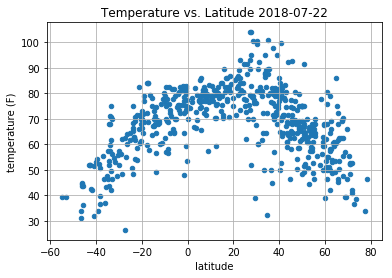

<Figure size 432x288 with 0 Axes>

In [88]:
# Temperature (F) vs. Latitude
df.plot(kind='scatter', x='latitude', y='temperature')
plt.title("Temperature vs. Latitude " + str(today))
plt.xlabel("latitude")
plt.ylabel("temperature (F)")

plt.grid(True)
plt.show()

fig_temp = plt.figure()

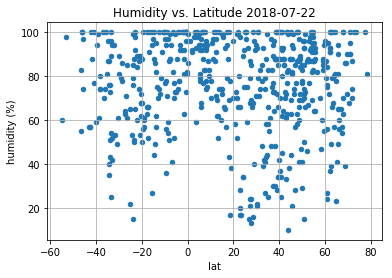

<Figure size 432x288 with 0 Axes>

In [89]:
# Humidity (%) vs. Latitude
df.plot(kind='scatter', x='latitude', y='humidity')
plt.title("Humidity vs. Latitude " + str(today))
plt.xlabel("lat")
plt.ylabel("humidity (%)")

plt.grid(True)
plt.show()

fig_humi = plt.figure()

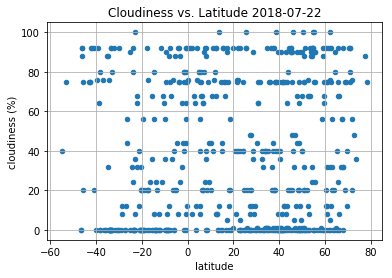

<Figure size 432x288 with 0 Axes>

In [90]:
# Cloudiness (%) vs. Latitude
df.plot(kind='scatter', x='latitude', y='cloudiness')
plt.title("Cloudiness vs. Latitude " + str(today))
plt.xlabel("latitude")
plt.ylabel("cloudiness (%)")

plt.grid(True)
plt.show()

fig_cloud = plt.figure()

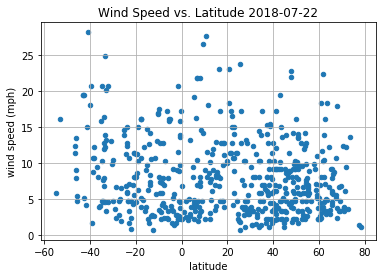

<Figure size 432x288 with 0 Axes>

In [91]:
# Wind Speed (mph) vs. Latitude
df.plot(kind='scatter', x='latitude', y='windspeed')
plt.title("Wind Speed vs. Latitude " + str(today))
plt.xlabel("latitude")
plt.ylabel("wind speed (mph)")

plt.grid(True)
plt.show()

fig_wind = plt.figure()

In [83]:
#export dataframe as csv
df.to_csv(file_out)

In [99]:
#export scatterplots as png's
fig_temp.savefig(os.path.join('output_data','temp_vs_lat.png'))
fig_humi.savefig(os.path.join('output_data','humi_vs_lat.png'))
fig_cloud.savefig(os.path.join('output_data','cloud_vs_lat.png'))
fig_wind.savefig(os.path.join('output_data','wind_vs_lat.png'))